## R code to make BCD-output violin plot with, as input signal ISTS 65 dB

6 April 2022 GC, 

In [1]:
library('data.table')
library(stringr)
library("ggplot2")

In [2]:
#' Read data from a CSV file and rename columns
#'
#' This function reads data from a CSV file at the specified path and renames the
#' columns by removing non-numeric characters. It returns the updated data frame.
#'
#' @param path_in The path to the input CSV file
#' @return The data frame with renamed columns

read_output <- function(path_in) {
    
  # read data from csv
  dt <- read.csv(path_in)
  
  # rename columns
  clm = colnames(dt)
  clm <- clm[-1]
  newco <- c('Study_ID', str_extract(clm, '\\d+'))
  colnames(dt) <- newco
  
  # return the data frame
  return(dt)
}


In [3]:
#' Create a violin plot with boxplot
#'
#' This function creates a violin plot using data from the 'data_frame' data frame.
#' The violins are colored in red.
#'
#' @param data_frame The data frame containing the data for the plot
#' @param color_scheme A vector of colors for frequency bands (default: use red)
#' @return The violin plot
#' @export

create_violin_plot <- function(data_frame) {
  
  # Make plots wider 
  options(repr.plot.width=12, repr.plot.height=9)
    
  # chose colors
  ColorBlind2  <- c("#E69F00", "#56B4E9")

  # Create the violin plot
  p <- ggplot(data_frame, aes(x = Frequency_band, y = Output)) +
    geom_violin(width=1.8, fill=ColorBlind2[1])+
    geom_boxplot(width=.25, outlier.colour="#56B4E9") 
  p <- p + theme_linedraw() 
    
  # Add title and axis labels
  p <- p + ggtitle("") +
    xlab("CF 1/3 octave band [Hz]") +
    ylab("Output BCD on skull simulator [dB ref 1 μN]")

  return(p)
}


In [4]:
# input directory
din <- '/media/guido/LACIE/Cingle_Guido/Master/Implant/Primary_data/' 

# input file
fin = 'output_BCD_65dB.csv'

# input file path
pin <- paste(din, fin, sep = "")

In [5]:
bcd_output <- read_output(pin)
bcd_output

Study_ID,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000,5000,6300,8000
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,54.4,57.3,62.9,74.8,80.9,79.6,75.2,78.9,81.8,78.6,76.8,76.3,71.7,68.6,67.5,59.1
35,53.8,57.7,65.9,79.7,86.8,87.2,82.9,82.9,86.0,84.0,76.1,71.9,72.2,73.6,73.9,65.0
43,54.3,58.6,66.8,80.9,88.0,88.3,84.5,84.4,84.4,79.8,75.3,75.4,74.2,72.2,69.7,60.3
47,54.7,58.0,65.0,78.8,85.8,86.0,82.2,81.9,80.5,72.9,67.4,70.3,71.7,69.9,67.0,57.4
50,53.9,57.4,67.2,80.6,87.2,87.1,83.0,83.3,82.5,76.2,71.8,73.4,74.0,73.7,72.6,63.2
53,55.0,58.8,68.3,83.7,90.7,90.5,85.5,82.7,79.7,72.0,69.2,70.8,71.1,70.6,69.3,60.0
54,55.8,59.7,69.6,84.5,91.5,91.4,86.5,84.4,82.5,76.5,73.9,74.4,72.4,70.6,69.0,60.0
56,56.9,60.8,69.7,84.9,92.1,92.2,88.3,88.3,87.6,81.8,78.6,79.9,79.0,77.6,75.0,65.3
59,55.2,58.8,69.3,84.0,90.8,90.6,85.7,82.7,79.6,72.7,68.2,70.8,72.3,70.3,66.0,55.9


In [6]:
output_long <- melt(setDT(bcd_output), id.vars = c('Study_ID'), 
                 value.name = 'Output', variable.name = 'Frequency_band')

Warning message:
“`position_dodge()` requires non-overlapping x intervals”


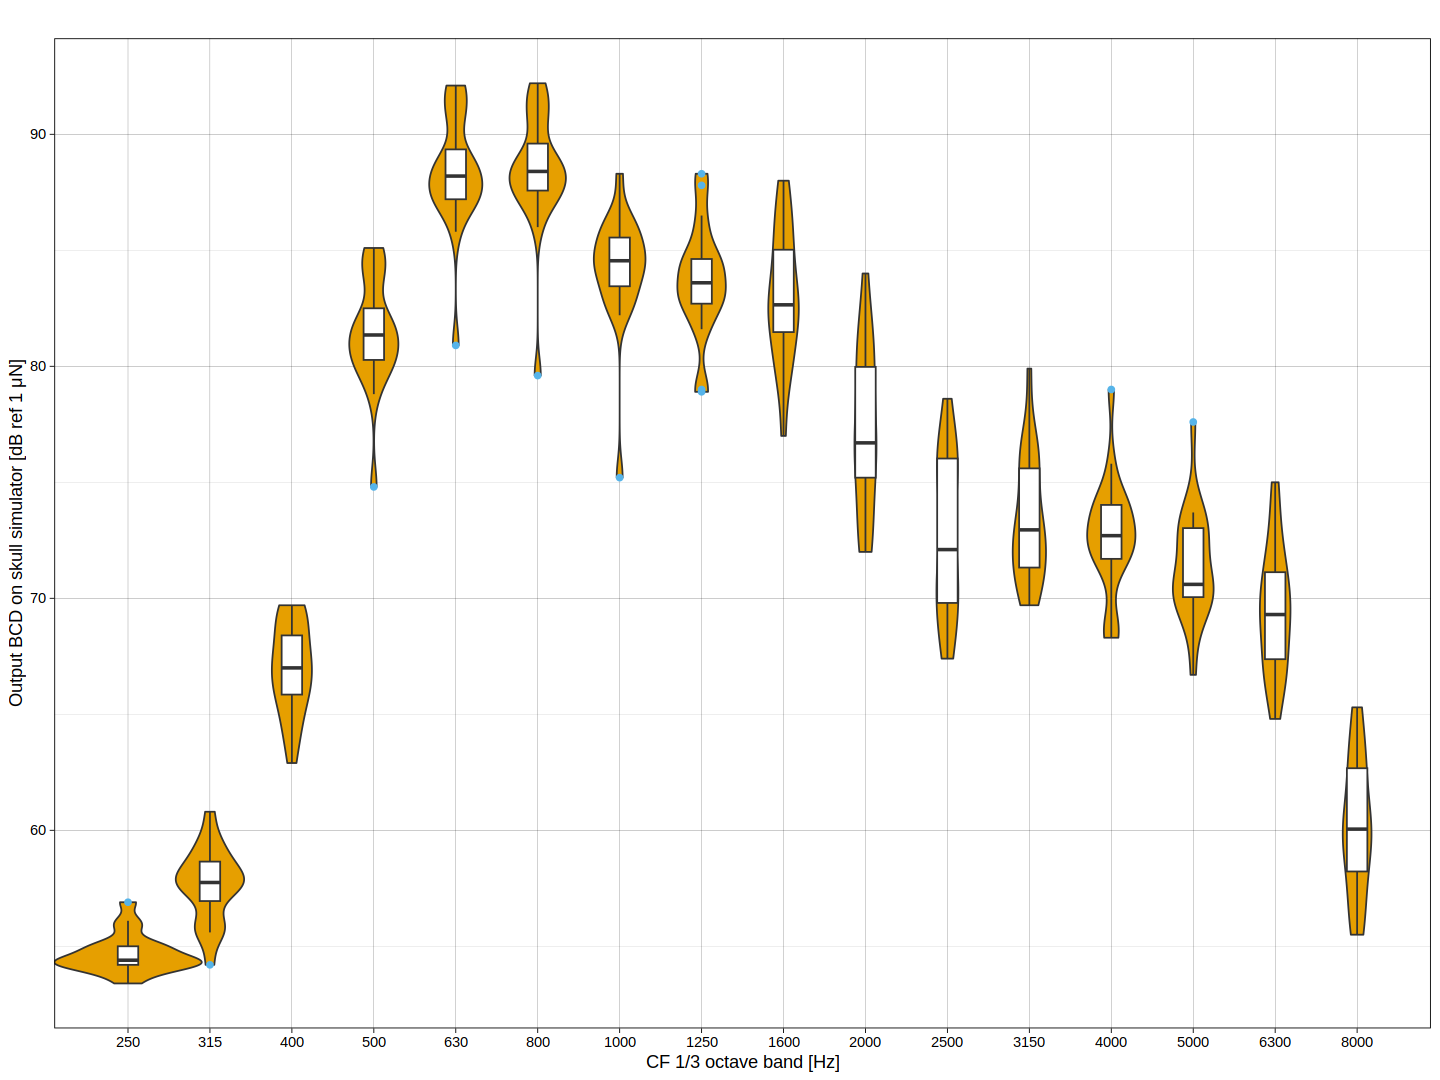

In [7]:
plot <- create_violin_plot(output_long)
plot

In [8]:


tiff("/media/guido/LACIE/Cingle_Guido/Master/Implant/Figures_R/output_violin_65.tiff", units="in", width=9, height=6, res=300)
plot
dev.off()

Warning message:
“`position_dodge()` requires non-overlapping x intervals”


png 
  2